Сырая версия EDA

In [1]:
import pandas as pd

from utils import (
    joinpath,
    hist_boxplot,
    get_total_price_by_rule
)

In [2]:
# Настройка для `cleaned_rides_users_subscriptions_go.csv`
rides_users_subscriptions_options = {
    "filepath_or_buffer": joinpath("data", "cleaned_rides_users_subscriptions_go.csv"),
    "encoding": "utf-8",
    "parse_dates": ["date"],
}

rides_users_subscriptions_df = pd.read_csv(**rides_users_subscriptions_options)

In [3]:
rides_users_subscriptions_df.sample(10)

,user_id,distance,duration,date,name,age,city,subscription_type,minute_price,start_ride_price,subscription_fee
16616,1438,1673.0,23.0,2021-06-12,Тамара,30,Пятигорск,free,8,50,0
5758,614,4208.0,28.0,2021-10-10,Кристина,26,Ростов-на-Дону,ultra,6,0,199
10101,967,6021.0,21.0,2021-11-03,Элина,28,Краснодар,free,8,50,0
13603,1223,5237.0,32.0,2021-01-22,Злата,22,Тюмень,free,8,50,0
4012,432,3830.0,21.0,2021-12-30,Мадина,21,Омск,ultra,6,0,199
10065,965,2089.0,15.0,2021-09-26,Святослав,23,Пятигорск,free,8,50,0
12696,1158,1657.0,14.0,2021-10-27,Снежана,27,Сочи,free,8,50,0
12026,1109,813.0,14.0,2021-05-27,Демид,25,Ростов-на-Дону,free,8,50,0
3463,372,2498.0,16.0,2021-12-07,Арсен,26,Ростов-на-Дону,ultra,6,0,199
4913,529,1419.0,7.0,2021-08-14,Арсений,25,Пятигорск,ultra,6,0,199


In [4]:
rides_users_subscriptions_df.isna().sum()

user_id              0
distance             0
duration             0
date                 0
name                 0
age                  0
city                 0
subscription_type    0
minute_price         0
start_ride_price     0
subscription_fee     0
dtype: int64

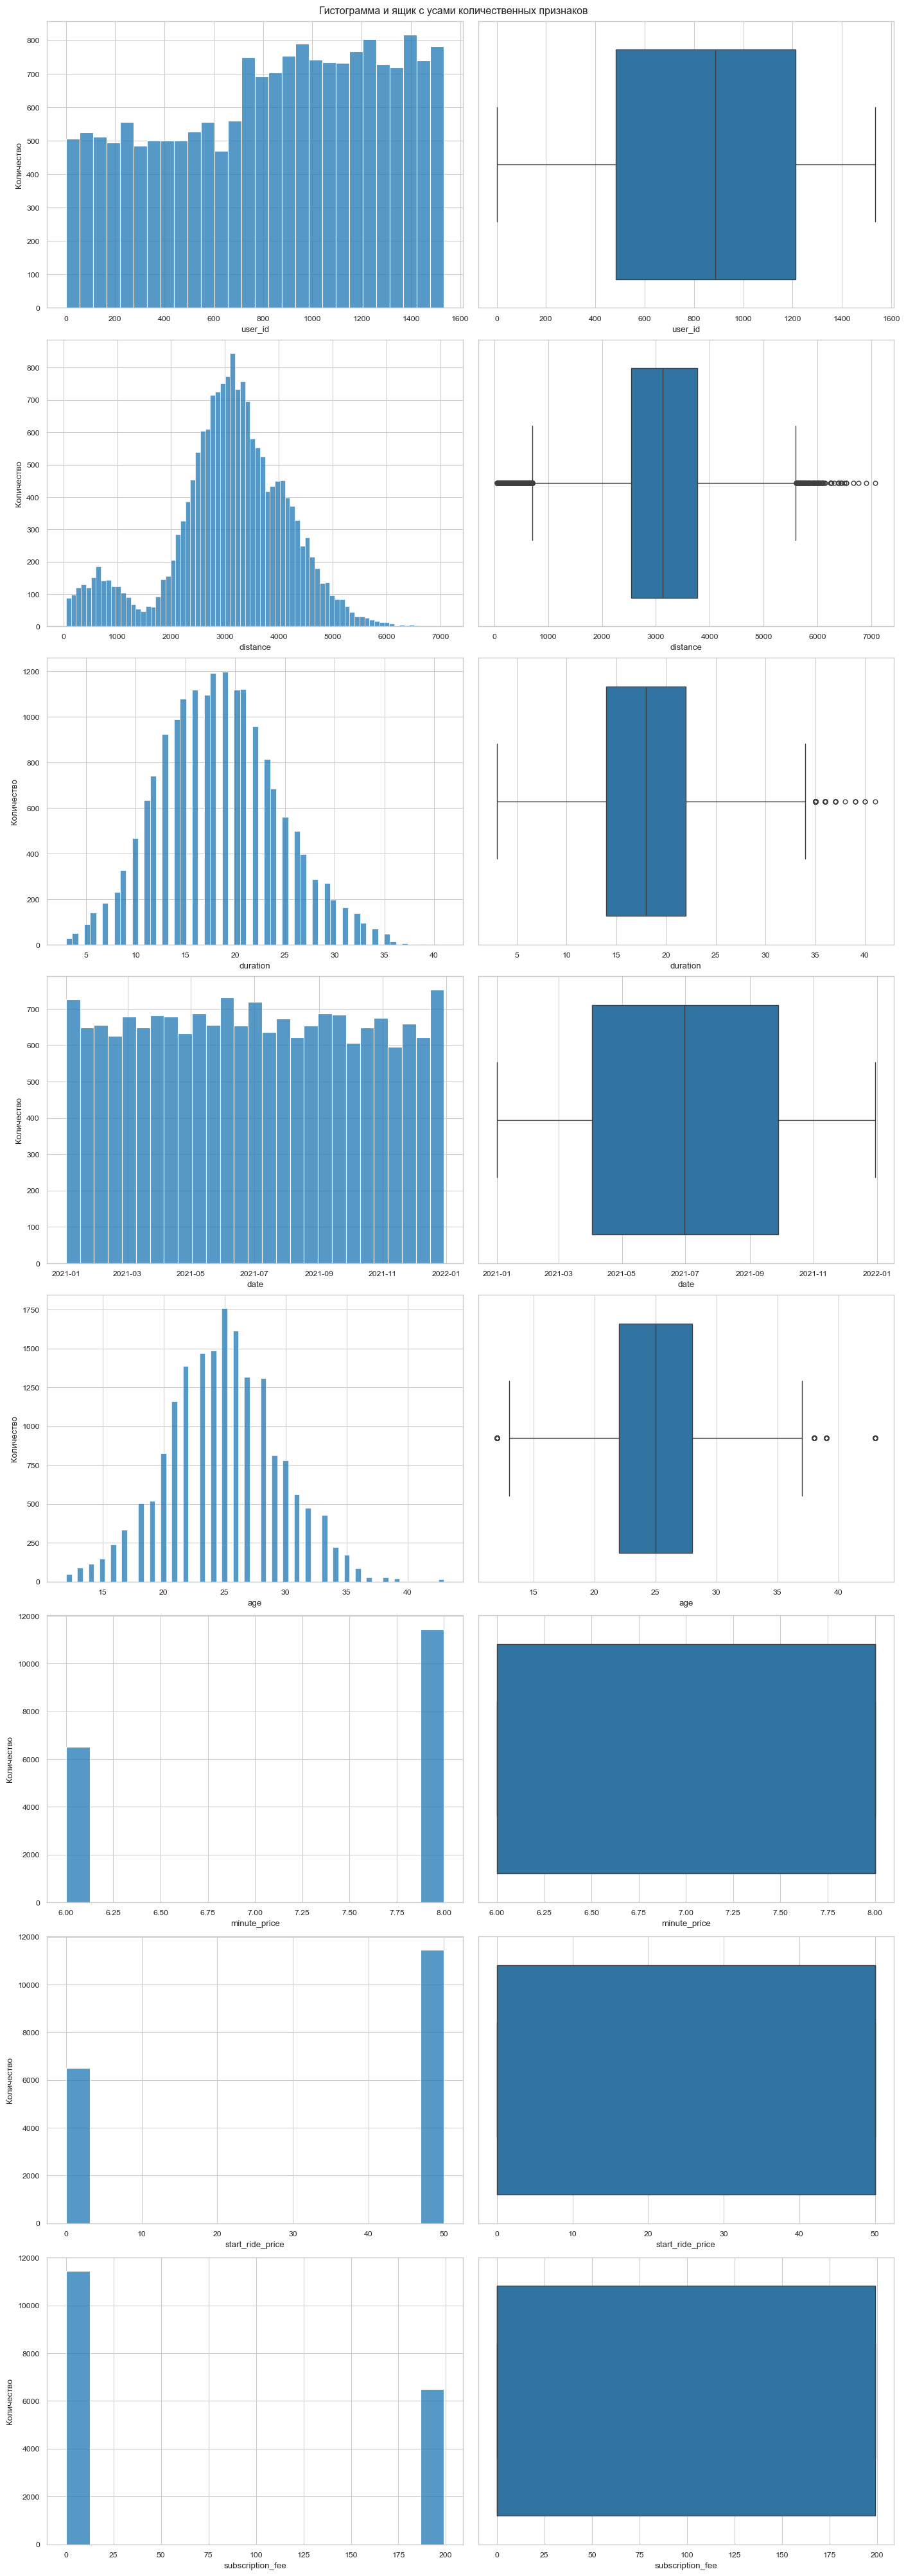

In [5]:
hist_boxplot(rides_users_subscriptions_df, columns=rides_users_subscriptions_df.select_dtypes(exclude=['object']).columns)

Данные валидны можно начинать EDA по гистограмме с `user_id` можно понять сразу, что более новые пользователи пользуются более часто нежели старые может говорить о маркетинговом ходу сделанным для всех новых пользователях либо другой акции.

In [6]:
users_with_sub = rides_users_subscriptions_df[rides_users_subscriptions_df["subscription_type"] == "ultra"]

users_no_sub = rides_users_subscriptions_df[rides_users_subscriptions_df["subscription_type"] != "ultra"]

Разделили людей на пользователей с подпиской и без для удобства анализа.

In [11]:
total_price_with_sub = get_total_price_by_rule(users_no_sub, "ME")

total_price_no_sub = get_total_price_by_rule(users_no_sub, "ME")

date
2021-01-31    193060.0
2021-02-28    165392.0
2021-03-31    186218.0
2021-04-30    185118.0
2021-05-31    187280.0
2021-06-30    191286.0
2021-07-31    184364.0
2021-08-31    186408.0
2021-09-30    192758.0
2021-10-31    180812.0
2021-11-30    178006.0
2021-12-31    194318.0
Freq: ME, Name: total_price, dtype: float64